In [110]:
import gymnasium as gym
import numpy as np
import pandas as pd
import cv2
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from gym.wrappers import GrayScaleObservation, FrameStack
import matplotlib.pyplot as plt

In [111]:
env = gym.make('CarRacing-v2', domain_randomize=True)

In [112]:
obs, _ = env.reset()

In [113]:
obs.shape

(96, 96, 3)

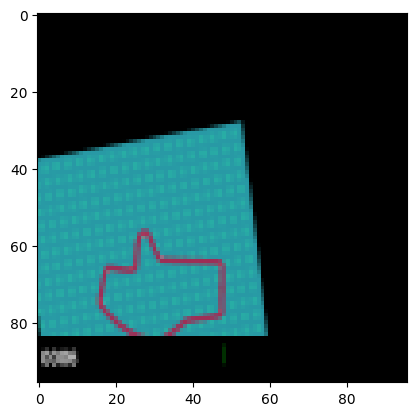

In [114]:
plt.imshow(obs)

In [115]:
for i in range(50):
    die = False
    done = False

    while(not die or not done):
        obs, reward, term, trunc, info = env.step()


TypeError: step() missing 1 required positional argument: 'action'

In [ ]:
# import gym
# import numpy as np
# import pygame
# import cv2
# import os
# from pygame.locals import *

# # --- Masking Pipeline ---
# def apply_gaussian_blur(channel, ksize=5):
#     return cv2.GaussianBlur(channel, (ksize, ksize), 0)

# def adjust_brightness(channel, factor=1.2):
#     channel = np.clip(np.float32(channel) * factor, 0, 255)
#     return np.uint8(channel)

# def adjust_saturation_single_channel(channel, factor=1.5):
#     rgb = cv2.merge([channel, channel, channel])
#     hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
#     hsv[..., 1] = np.clip(hsv[..., 1] * factor, 0, 255)
#     saturated = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
#     return cv2.cvtColor(saturated, cv2.COLOR_RGB2GRAY)

# def extract_center_value(channel, region_size=7, offset_y=10):
#     h, w = channel.shape
#     cx, cy = w // 2, h // 2
#     offsets = [-offset_y, 0, offset_y]
#     values = []
#     for off in offsets:
#         y1 = cy + off - region_size // 2
#         y2 = cy + off + region_size // 2
#         x1 = cx - region_size // 2
#         x2 = cx + region_size // 2
#         region = channel[y1:y2, x1:x2]
#         values.append(np.mean(region))
#     return np.mean(values)

# def extract_mask(channel, center_value, tolerance=25):
#     diff = np.abs(channel.astype(np.int16) - int(center_value))
#     mask = np.uint8(diff < tolerance) * 255
#     kernel = np.ones((3, 3), np.uint8)
#     mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
#     mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
#     return mask

# def mask_quality(mask):
#     white = np.sum(mask == 255)
#     total = mask.size
#     return white / total

# def combine_masks(mask_r, mask_g, mask_b, threshold=127):
#     qualities = [mask_quality(mask_r), mask_quality(mask_g), mask_quality(mask_b)]
#     valid = [(0.05 < q < 0.29) for q in qualities]
#     masks = [mask_r, mask_g, mask_b]
#     used = [m for m, v in zip(masks, valid) if v]
#     if not used:
#         return np.zeros_like(mask_r)
#     weight = 1.0 / len(used)
#     combined = sum(weight * m for m in used)
#     _, binary = cv2.threshold(combined.astype(np.uint8), threshold, 255, cv2.THRESH_BINARY)
#     return binary

# def get_binary_mask(obs, frame_count, center_color):
#     r, g, b = cv2.split(obs)
#     r_proc = adjust_saturation_single_channel(adjust_brightness(apply_gaussian_blur(r, 5), factor=0.9), factor=1.5)
#     g_proc = adjust_saturation_single_channel(adjust_brightness(apply_gaussian_blur(g, 5), factor=0.9), factor=1.5)
#     b_proc = adjust_saturation_single_channel(adjust_brightness(apply_gaussian_blur(b, 5), factor=0.9), factor=1.5)

#     if frame_count == 15:
#         r_val = extract_center_value(r)
#         g_val = extract_center_value(g)
#         b_val = extract_center_value(b)
#         center_color[:] = [r_val, g_val, b_val]

#     if center_color[0] is not None:
#         mask_r = extract_mask(r_proc, center_color[0])
#         mask_g = extract_mask(g_proc, center_color[1])
#         mask_b = extract_mask(b_proc, center_color[2])
#         return combine_masks(mask_r, mask_g, mask_b)
#     else:
#         return np.zeros_like(r)

# # --- Action mapping ---
# def get_action_from_keys():
#     keys = pygame.key.get_pressed()
#     action = np.array([0.0, 0.0, 0.0])
#     if keys[K_LEFT] or keys[K_a]:
#         action[0] = -1.0
#     if keys[K_RIGHT] or keys[K_d]:
#         action[0] = 1.0
#     if keys[K_UP] or keys[K_w]:
#         action[1] = 1.0
#     if keys[K_DOWN] or keys[K_s]:
#         action[2] = 0.8
#     return action

# # --- Setup ---
# pygame.init()
# screen = pygame.display.set_mode((96, 96))
# pygame.display.set_caption("CarRacing Manual Control with Mask")
# clock = pygame.time.Clock()

# save_dir = "expert_runs"
# os.makedirs(save_dir, exist_ok=True)

# env = gym.make("CarRacing-v2", render_mode="rgb_array", domain_randomize=True)

# for ep_num in range(5):
#     print(f"🎮 Starting Episode {ep_num+1}/50")
#     obs, _ = env.reset()
#     done = False
#     truncated = False

#     frame_count = 0
#     center_color = [None, None, None]
#     obs_masks = []
#     actions = []

#     while not (done or truncated):
#         frame = env.render()
#         # resized_frame = cv2.resize(frame)
#         surface = pygame.surfarray.make_surface(np.transpose(frame, (1, 0, 2)))
#         screen.blit(surface, (0, 0))
#         pygame.display.flip()

#         for event in pygame.event.get():
#             if event.type == QUIT:
#                 done = True
#                 pygame.quit()
#                 env.close()
#                 exit()

#         action = get_action_from_keys()
#         mask = get_binary_mask(frame, frame_count, center_color)

#         obs_masks.append(mask)
#         actions.append(action)

#         _, _, done, truncated, _ = env.step(action)
#         clock.tick(60)
#         frame_count += 1

#     obs_masks = np.array(obs_masks)
#     actions = np.array(actions)
#     filename = os.path.join(save_dir, f"run_{ep_num+5:02d}.npz")
#     np.savez_compressed(filename, obs=obs_masks, acts=actions)
#     print(f"✅ Saved Episode {ep_num+1} to {filename}")

# pygame.quit()
# env.close()
import gym
import numpy as np
import pygame
import os
from pygame.locals import *
import cv2

# --- Masking Pipeline ---
def apply_gaussian_blur(channel, ksize=5):
    return cv2.GaussianBlur(channel, (ksize, ksize), 0)

def adjust_brightness(channel, factor=1.2):
    channel = np.clip(np.float32(channel) * factor, 0, 255)
    return np.uint8(channel)

def adjust_saturation_single_channel(channel, factor=1.5):
    rgb = cv2.merge([channel, channel, channel])
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    hsv[..., 1] = np.clip(hsv[..., 1] * factor, 0, 255)
    saturated = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return cv2.cvtColor(saturated, cv2.COLOR_RGB2GRAY)

def extract_center_value(channel, region_size=7, offset_y=10):
    h, w = channel.shape
    cx, cy = w // 2, h // 2
    offsets = [-offset_y, 0, offset_y]
    values = []
    for off in offsets:
        y1 = cy + off - region_size // 2
        y2 = cy + off + region_size // 2
        x1 = cx - region_size // 2
        x2 = cx + region_size // 2
        region = channel[y1:y2, x1:x2]
        values.append(np.mean(region))
    return np.mean(values)

def extract_mask(channel, center_value, tolerance=25):
    diff = np.abs(channel.astype(np.int16) - int(center_value))
    mask = np.uint8(diff < tolerance) * 255
    kernel = np.ones((3, 3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
    return mask

def mask_quality(mask):
    white = np.sum(mask == 255)
    total = mask.size
    return white / total

def combine_masks(mask_r, mask_g, mask_b, threshold=127):
    qualities = [mask_quality(mask_r), mask_quality(mask_g), mask_quality(mask_b)]
    valid = [(0.05 < q < 0.29) for q in qualities]
    masks = [mask_r, mask_g, mask_b]
    used = [m for m, v in zip(masks, valid) if v]
    if not used:
        return np.zeros_like(mask_r)
    weight = 1.0 / len(used)
    combined = sum(weight * m for m in used)
    _, binary = cv2.threshold(combined.astype(np.uint8), threshold, 255, cv2.THRESH_BINARY)
    return binary

def get_binary_mask(obs, frame_count, center_color):
    r, g, b = cv2.split(obs)
    r_proc = adjust_saturation_single_channel(adjust_brightness(apply_gaussian_blur(r, 5), factor=0.9), factor=1.5)
    g_proc = adjust_saturation_single_channel(adjust_brightness(apply_gaussian_blur(g, 5), factor=0.9), factor=1.5)
    b_proc = adjust_saturation_single_channel(adjust_brightness(apply_gaussian_blur(b, 5), factor=0.9), factor=1.5)

    if frame_count == 15:
        r_val = extract_center_value(r)
        g_val = extract_center_value(g)
        b_val = extract_center_value(b)
        center_color[:] = [r_val, g_val, b_val]

    if center_color[0] is not None:
        mask_r = extract_mask(r_proc, center_color[0])
        mask_g = extract_mask(g_proc, center_color[1])
        mask_b = extract_mask(b_proc, center_color[2])
        mask = combine_masks(mask_r, mask_g, mask_b)
        # print(f"Mask shape: {mask.shape}, Mask quality: {mask_quality(mask)}")  # Debugging the mask
        return mask
    else:
        return np.zeros_like(r)

# --- Action mapping ---
def get_action_from_keys():
    keys = pygame.key.get_pressed()
    action = np.array([0.0, 0.0, 0.0])
    if keys[K_LEFT] or keys[K_a]:
        action[0] = -1.0
    if keys[K_RIGHT] or keys[K_d]:
        action[0] = 1.0
    if keys[K_UP] or keys[K_w]:
        action[1] = 1.0
    if keys[K_DOWN] or keys[K_s]:
        action[2] = 0.8
    return action

# --- Setup ---
pygame.init()
screen = pygame.display.set_mode((600, 600))  # Adjusted screen size for better human interaction
pygame.display.set_caption("CarRacing Manual Control with Mask")

save_dir = "expert_runs"
os.makedirs(save_dir, exist_ok=True)

# Set up the gym environment with "human" mode for rendering
env = gym.make("CarRacing-v2", render_mode="human", domain_randomize=True)

# --- Main Loop ---
for ep_num in range(5):
    print(f"🎮 Starting Episode {ep_num+1}/5")
    obs, _ = env.reset()
    done = False
    truncated = False

    frame_count = 0
    obs_data = []
    mask_data = []
    actions = []

    center_color = [None, None, None]  # Used for calculating the color center over time

    while not (done or truncated):
        # Render the environment for human visualization
        # env.render(mode="human")

        # The raw observation after taking the action
        raw_obs = obs  # This is the observation returned by env.step() in the next iteration

        # Convert the frame to a surface for pygame
        surface = pygame.surfarray.make_surface(np.transpose(raw_obs, (1, 0, 2)))
        screen.blit(surface, (0, 0))
        pygame.display.flip()

        # Handle pygame events (like quitting the environment)
        for event in pygame.event.get():
            if event.type == QUIT:
                done = True
                pygame.quit()
                env.close()
                exit()

        # Get the action from user input
        action = get_action_from_keys()

        # Get the binary mask for the raw observation after the action
        mask = get_binary_mask(raw_obs, frame_count, center_color)

        # Append raw observation, mask, and action
        obs_data.append(raw_obs)
        mask_data.append(mask)
        actions.append(action)

        # Debugging: print the size of the mask and check if it's empty
        # print(f"Frame {frame_count}: Mask size {mask.shape}, Mask max value {np.max(mask)}")

        # Take action in the environment and get the next observation
        obs, _, done, truncated, _ = env.step(action)
        frame_count += 1

    # Save the collected raw observations, masks, and actions
    obs_data = np.array(obs_data)
    mask_data = np.array(mask_data)
    actions = np.array(actions)

    # Debugging: check the shapes of the saved data
    print(f"Saving episode {ep_num+1}: Observations shape {obs_data.shape}, Masks shape {mask_data.shape}, Actions shape {actions.shape}")

    # Save to a compressed npz file for this episode
    filename = os.path.join(save_dir, f"run_{ep_num+16:02d}.npz")
    np.savez_compressed(filename, obs=obs_data, masks=mask_data, acts=actions)
    print(f"✅ Saved Episode {ep_num+1} to {filename}")

pygame.quit()
env.close()


🎮 Starting Episode 1/5


2025-04-29 16:17:29.370 python[45552:2019561] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-29 16:17:29.371 python[45552:2019561] +[IMKInputSession subclass]: chose IMKInputSession_Modern
/opt/miniconda3/envs/myenv38/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Saving episode 1: Observations shape (1000, 96, 96, 3), Masks shape (1000, 96, 96), Actions shape (1000, 3)
✅ Saved Episode 1 to expert_runs/run_16.npz
🎮 Starting Episode 2/5


error: video system not initialized

: 

In [132]:
import os
import numpy as np
import torch

def process_and_save_all_in_one(directory, output_filename="final_dataset.pt"):
    # Get a list of all .npz files in the directory
    files = [f for f in os.listdir(directory) if f.endswith('.npz')]
    
    if not files:
        print("No .npz files found in the directory.")
        return
    
    all_masks = []
    all_actions = []

    for file in files:
        file_path = os.path.join(directory, file)
        try:
            data = np.load(file_path)

            if 'masks' in data and 'acts' in data:
                masks = data['masks']
                actions = data['acts']

                if len(masks) > 30:
                    masks = masks[11:-15]
                    actions = actions[11:-15]

                    all_masks.append(masks)
                    all_actions.append(actions)
                    print(f"✅ Processed and added {file}")
                else:
                    print(f"⚠️ Skipped {file} — not enough frames.")
            else:
                print(f"⚠️ {file} missing 'masks' or 'acts'.")
        except Exception as e:
            print(f"❌ Error processing {file}: {e}")

    if all_masks and all_actions:
        all_masks = np.concatenate(all_masks, axis=0)  # (N, 96, 96)
        all_actions = np.concatenate(all_actions, axis=0)  # (N, 3)

        # ✅ Normalize masks to [0, 1] range
        all_masks = all_masks.astype(np.float32) / 255.0

        # Convert to torch tensors and add channel dimension
        obs_tensor = torch.tensor(all_masks).unsqueeze(1)  # (N, 1, 96, 96)
        acts_tensor = torch.tensor(all_actions, dtype=torch.float32)  # (N, 3)

        save_path = os.path.join(directory, output_filename)
        torch.save({'obs': obs_tensor, 'acts': acts_tensor}, save_path)
        print(f"✅ Saved final dataset to {save_path} (normalized, PyTorch .pt format)")
    else:
        print("❌ No valid data found to save.")

# Usage
directory = "expert_runs"  # Replace with your directory path
process_and_save_all_in_one(directory)


✅ Processed and added run_08.npz
✅ Processed and added run_04.npz
✅ Processed and added run_05.npz
✅ Processed and added run_07.npz
✅ Processed and added run_06.npz
✅ Processed and added run_02.npz
✅ Processed and added run_03.npz
✅ Processed and added run_01.npz
✅ Saved final dataset to expert_runs/final_dataset.pt (normalized, PyTorch .pt format)


In [131]:
# import os
# import numpy as np
# import torch

# def preprocess_npz_dataset(npz_dir, save_path):
#     all_obs = []
#     all_acts = []

#     for fname in os.listdir(npz_dir):
#         if not fname.endswith('.npz'):
#             continue
#         data = np.load(os.path.join(npz_dir, fname))
#         obs = data['obs'][15:]  # Remove first 15 frames
#         acts = data['acts'][15:]
#         all_obs.append(obs)
#         all_acts.append(acts)

#     # Stack everything
#     all_obs = np.concatenate(all_obs, axis=0)  # shape: (N, 96, 96)
#     all_acts = np.concatenate(all_acts, axis=0)  # shape: (N, 3)

#     # Normalize obs to [0.0, 1.0] and add channel dimension
#     all_obs = all_obs.astype(np.float32) / 255.0
#     all_obs = np.expand_dims(all_obs, axis=1)  # shape: (N, 1, 96, 96)

#     # Convert to torch tensors
#     obs_tensor = torch.tensor(all_obs, dtype=torch.float32)
#     act_tensor = torch.tensor(all_acts, dtype=torch.float32)

#     # Save as a single .pt file
#     torch.save({'obs': obs_tensor, 'acts': act_tensor}, save_path)
#     print(f"✅ Saved processed dataset to {save_path}")

# # Run preprocessing
# preprocess_npz_dataset('expert_runs', 'final_dataset.pt')


In [136]:
class BehaviorCloningDataset(torch.utils.data.Dataset):
    def __init__(self, data_path, stack_size=4):
        data = torch.load(data_path)
        self.obs = data['obs']  # (N, 1, 96, 96)
        self.acts = data['acts']  # (N, 3)
        self.stack_size = stack_size

        assert len(self.obs) >= stack_size, "Not enough frames to create stacks"

    def __len__(self):
        return len(self.obs) - self.stack_size + 1

    def __getitem__(self, idx):
        # Get a list of tensors to stack
        obs_stack = [self.obs[idx + i] for i in range(self.stack_size)]  # list of (1, 96, 96)
        obs_stack = torch.cat(obs_stack, dim=0)  # (4, 96, 96)

        act = self.acts[idx + self.stack_size - 1]  # use action from last frame in stack
        return obs_stack, act


In [137]:
import torch.nn as nn
import torch.nn.functional as F

class TrackFeatureCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(4, 16, kernel_size=5, stride=2, padding=2)  # Changed input channels to 4
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1)

        self.fc1 = nn.Linear(64 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 3)

    def forward(self, x):
        x = F.relu(self.conv1(x))  # (B, 4, 96, 96) → (B, 16, 48, 48)
        x = F.relu(self.conv2(x))  # (B, 32, 24, 24)
        x = F.relu(self.conv3(x))  # (B, 64, 12, 12)
        x = F.relu(self.conv4(x))  # (B, 64, 6, 6)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)


In [138]:
# Load saved .pt dataset
data = torch.load("expert_runs/final_dataset.pt")

obs = data['obs']  # shape: (N, 1, 96, 96)
acts = data['acts']  # shape: (N, 3)

# Basic checks
print("✅ Dataset loaded!")
print(f"Observations shape: {obs.shape}")
print(f"Actions shape: {acts.shape}")

# Check data type and range
print(f"Obs dtype: {obs.dtype}, min: {obs.min()}, max: {obs.max()}")
print(f"Acts dtype: {acts.dtype}, min: {acts.min()}, max: {acts.max()}")

# Check one sample
i = 0
print(f"Sample {i} action: {acts[i]}")


✅ Dataset loaded!
Observations shape: torch.Size([7511, 1, 96, 96])
Actions shape: torch.Size([7511, 3])
Obs dtype: torch.float32, min: 0.0, max: 1.0
Acts dtype: torch.float32, min: -1.0, max: 1.0
Sample 0 action: tensor([0., 0., 0.])


/var/folders/qj/nwy8w3y94qd1w66kj2j_mn400000gn/T/ipykernel_6661/4240038609.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load("expert_runs/final_dataset.p

In [139]:
obs.shape

torch.Size([7511, 1, 96, 96])

In [141]:
from torch.utils.data import DataLoader
import torch.optim as optim

# Load dataset
dataset = BehaviorCloningDataset('expert_runs/final_dataset.pt')
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Initialize model, loss, optimizer
model = TrackFeatureCNN()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Train loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for obs_batch, act_batch in dataloader:
        obs_batch = obs_batch.to(device)
        act_batch = act_batch.to(device)

        optimizer.zero_grad()
        outputs = model(obs_batch)
        loss = criterion(outputs, act_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(dataloader)
    print(f"📦 Epoch [{epoch+1}/{num_epochs}] - Loss: {avg_loss:.4f}")


/var/folders/qj/nwy8w3y94qd1w66kj2j_mn400000gn/T/ipykernel_6661/1401308735.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(data_path)


📦 Epoch [1/5] - Loss: 0.0513
📦 Epoch [2/5] - Loss: 0.0448
📦 Epoch [3/5] - Loss: 0.0405
📦 Epoch [4/5] - Loss: 0.0380
📦 Epoch [5/5] - Loss: 0.0357


In [142]:
torch.save(model, 'expert_runs/model_full.pth')

In [ ]:
# BBEHAVIOUR CLONING WORKING

import torch
import gymnasium as gym
import numpy as np
import cv2
from collections import deque

# Load trained model
model = torch.load('expert_runs/model_full.pth')
model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Set up environment
env = gym.make("CarRacing-v2", render_mode="human", domain_randomize=True)
obs, _ = env.reset()
done = False

# Init stack of 4 binary masks (grayscale 96x96)
frame_stack = deque(maxlen=4)
center_color = [None, None, None]
frame_count = 0

# Fill with initial identical masks
initial_mask = get_binary_mask(obs, frame_count, center_color) / 255.0  # normalize
for _ in range(4):
    frame_stack.append(initial_mask)

while not done:
    # Stack into (4, 96, 96), normalize already done
    stack_np = np.stack(frame_stack, axis=0)
    input_tensor = torch.tensor(stack_np, dtype=torch.float32).unsqueeze(0).to(device)  # (1, 4, 96, 96)

    with torch.no_grad():
        action = model(input_tensor).squeeze().cpu().numpy()

    action[0] = np.clip(action[0], -1.0, 1.0)
    action[1] = np.clip(action[1], 0.0, 1.0)
    action[2] = np.clip(action[2], 0.0, 1.0)

    obs, _, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

    frame_count += 1
    new_mask = get_binary_mask(obs, frame_count, center_color) / 255.0
    frame_stack.append(new_mask)

env.close()

/var/folders/qj/nwy8w3y94qd1w66kj2j_mn400000gn/T/ipykernel_6661/1220192667.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('expert_runs/model_full.pth

: 

In [173]:
env.close()


In [174]:
pygame.quit()

In [ ]:
import torch
import gymnasium as gym
import numpy as np
import cv2
from collections import deque
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Beta

device = 'cpu'

# --- PPO Model ---
class PPO(nn.Module):
    def __init__(self):
        super(PPO, self).__init__()
        self.conv1 = nn.Conv2d(4, 16, kernel_size=5, stride=2, padding=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1)

        self.fc1 = nn.Linear(64 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 2)  # Output alpha, beta for Beta distribution
        self.fc3 = nn.Linear(128, 1)  # Output value function (v)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        alpha_beta = self.fc2(x)  # Parameters for Beta distribution
        v = self.fc3(x)  # Value function
        alpha, beta = torch.exp(alpha_beta[:, 0]), torch.exp(alpha_beta[:, 1])
        return alpha, beta, v


class TrackFeatureCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(4, 16, kernel_size=5, stride=2, padding=2)  # Changed input channels to 4
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1)

        self.fc1 = nn.Linear(64 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 3)

    def forward(self, x):
        x = F.relu(self.conv1(x))  # (B, 4, 96, 96) → (B, 16, 48, 48)
        x = F.relu(self.conv2(x))  # (B, 32, 24, 24)
        x = F.relu(self.conv3(x))  # (B, 64, 12, 12)
        x = F.relu(self.conv4(x))  # (B, 64, 6, 6)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)


# --- Masking Pipeline ---
def apply_gaussian_blur(channel, ksize=5):
    return cv2.GaussianBlur(channel, (ksize, ksize), 0)

def adjust_brightness(channel, factor=1.2):
    channel = np.clip(np.float32(channel) * factor, 0, 255)
    return np.uint8(channel)

def adjust_saturation_single_channel(channel, factor=1.5):
    rgb = cv2.merge([channel, channel, channel])
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    hsv[..., 1] = np.clip(hsv[..., 1] * factor, 0, 255)
    saturated = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return cv2.cvtColor(saturated, cv2.COLOR_RGB2GRAY)

def extract_center_value(channel, region_size=7, offset_y=10):
    h, w = channel.shape
    cx, cy = w // 2, h // 2
    offsets = [-offset_y, 0, offset_y]
    values = []
    for off in offsets:
        y1 = cy + off - region_size // 2
        y2 = cy + off + region_size // 2
        x1 = cx - region_size // 2
        x2 = cx + region_size // 2
        region = channel[y1:y2, x1:x2]
        values.append(np.mean(region))
    return np.mean(values)

def extract_mask(channel, center_value, tolerance=25):
    diff = np.abs(channel.astype(np.int16) - int(center_value))
    mask = np.uint8(diff < tolerance) * 255
    kernel = np.ones((3, 3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
    return mask

def mask_quality(mask):
    white = np.sum(mask == 255)
    total = mask.size
    return white / total

def combine_masks(mask_r, mask_g, mask_b, threshold=127):
    qualities = [mask_quality(mask_r), mask_quality(mask_g), mask_quality(mask_b)]
    valid = [(0.05 < q < 0.29) for q in qualities]
    masks = [mask_r, mask_g, mask_b]
    used = [m for m, v in zip(masks, valid) if v]
    if not used:
        return np.zeros_like(mask_r)
    weight = 1.0 / len(used)
    combined = sum(weight * m for m in used)
    _, binary = cv2.threshold(combined.astype(np.uint8), threshold, 255, cv2.THRESH_BINARY)
    return binary

def get_binary_mask(obs, frame_count, center_color):
    r, g, b = cv2.split(obs)
    r_proc = adjust_saturation_single_channel(adjust_brightness(apply_gaussian_blur(r, 5), factor=0.9), factor=1.5)
    g_proc = adjust_saturation_single_channel(adjust_brightness(apply_gaussian_blur(g, 5), factor=0.9), factor=1.5)
    b_proc = adjust_saturation_single_channel(adjust_brightness(apply_gaussian_blur(b, 5), factor=0.9), factor=1.5)

    if frame_count == 15:
        r_val = extract_center_value(r)
        g_val = extract_center_value(g)
        b_val = extract_center_value(b)
        center_color[:] = [r_val, g_val, b_val]

    if center_color[0] is not None:
        mask_r = extract_mask(r_proc, center_color[0])
        mask_g = extract_mask(g_proc, center_color[1])
        mask_b = extract_mask(b_proc, center_color[2])
        mask = combine_masks(mask_r, mask_g, mask_b)
        return mask
    else:
        return np.zeros_like(r)


# --- Environment Setup ---
env = gym.make("CarRacing-v2", render_mode="human", domain_randomize=True)
obs, _ = env.reset()
done = False

# Initialize the BC model (pre-trained)

bc_model= torch.load('expert_runs/model_full.pth')  # Load your BC model here
bc_model.eval()

# Initialize PPO model and optimizer
ppo_model = PPO().to('cpu')
optimizer = optim.Adam(ppo_model.parameters(), lr=0.001)

# Stack for 4 grayscale images
frame_stack = deque(maxlen=4)
center_color = [None, None, None]
frame_count = 0

# Get initial binary mask for BC model (for teacher action)
initial_mask = get_binary_mask(obs, frame_count, center_color) / 255.0  # normalize
for _ in range(4):
    frame_stack.append(initial_mask)

# --- Training Loop ---
def calculate_loss(alpha, beta, v, actions, old_log_probs, advantages, gamma=0.99, epsilon=0.1):
    # Sample actions using Beta distribution
    dist = Beta(alpha, beta)
    action_log_probs = dist.log_prob(actions).sum()

    # Compute the ratio (probability ratio between new and old policy)
    ratio = torch.exp(action_log_probs - old_log_probs)

    # Calculate surrogate loss (clipped version of PPO)
    surr1 = ratio * advantages
    surr2 = torch.clamp(ratio, 1.0 - epsilon, 1.0 + epsilon) * advantages
    action_loss = -torch.min(surr1, surr2).mean()

    # Value loss (smooth L1 loss between predicted value and target value)
    advantages = torch.tensor([[advantages]], dtype=torch.float32).to(v.device)
    value_loss = F.smooth_l1_loss(v, advantages)
    
    # Total loss: action loss + value loss
    return action_loss + 2.0 * value_loss


# Training loop
while not done:
    # Stack input images (normalize)
    stack_np = np.stack(frame_stack, axis=0)
    input_tensor = torch.tensor(stack_np, dtype=torch.float32).unsqueeze(0).to(device)  # (1, 4, 96, 96)

    with torch.no_grad():
        # Teacher action (BC model) - used for initial training
        bc_action = bc_model(input_tensor).squeeze().cpu().numpy()

    # PPO model predicts alpha, beta (Beta distribution) and value (v)
    alpha, beta, v = ppo_model(input_tensor)

    # Sample action from Beta distribution
    dist = Beta(alpha, beta)
    action = dist.sample()

    # Clip to [0, 1] because Beta distribution supports only (0, 1)
    clipped_action = torch.clamp(action, 0.0, 1.0)

    # Compute log probability before converting to NumPy
    log_probs = dist.log_prob(clipped_action).sum()  # FIXED

    # Rescale to [-1, 1] if needed by environment
    rescaled_action = 2.0 * clipped_action - 1.0
    env_action = rescaled_action.cpu().numpy()

    # Store the transition for PPO learning
    new_mask = get_binary_mask(obs, frame_count, center_color) / 255.0
    frame_stack.append(new_mask)

    # Compute reward and advantage (simplified)
    reward = np.random.random()  # Simulated reward (replace with actual reward function)
    advantage = reward - v.item()  # Simplified advantage

    # Calculate the loss
    ppo_loss = calculate_loss(alpha, beta, v, torch.tensor(action).to(device), log_probs, advantage)

    # Backpropagate and update PPO parameters
    optimizer.zero_grad()
    ppo_loss.backward()
    optimizer.step()

    # Step in the environment with the action
    obs, _, terminated, truncated, _ = env.step(env_action)
    done = terminated or truncated
    frame_count += 1

env.close()


2025-04-29 18:19:19.298 python[5420:2321156] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-29 18:19:19.298 python[5420:2321156] +[IMKInputSession subclass]: chose IMKInputSession_Modern
/var/folders/qj/nwy8w3y94qd1w66kj2j_mn400000gn/T/ipykernel_5420/1697217655.py:143: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any

IndexError: index 1 is out of bounds for axis 0 with size 1

: 

In [ ]:
# TRAIN ON RL

import torch
import gymnasium as gym
import numpy as np
import cv2
from collections import deque
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Beta


# --- PPO Model ---
class PPO(nn.Module):
    def __init__(self):
        super(PPO, self).__init__()
        self.conv1 = nn.Conv2d(4, 16, kernel_size=5, stride=2, padding=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1)

        self.fc1 = nn.Linear(64 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 2)  # Output alpha, beta for Beta distribution
        self.fc3 = nn.Linear(128, 1)  # Output value function (v)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        alpha_beta = self.fc2(x)  # Parameters for Beta distribution
        v = self.fc3(x)  # Value function
        alpha, beta = torch.exp(alpha_beta[:, 0]), torch.exp(alpha_beta[:, 1])
        return alpha, beta, v


# --- Masking Pipeline (for BC model) ---
def apply_gaussian_blur(channel, ksize=5):
    return cv2.GaussianBlur(channel, (ksize, ksize), 0)

def adjust_brightness(channel, factor=1.2):
    channel = np.clip(np.float32(channel) * factor, 0, 255)
    return np.uint8(channel)

def adjust_saturation_single_channel(channel, factor=1.5):
    rgb = cv2.merge([channel, channel, channel])
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    hsv[..., 1] = np.clip(hsv[..., 1] * factor, 0, 255)
    saturated = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return cv2.cvtColor(saturated, cv2.COLOR_RGB2GRAY)

def extract_center_value(channel, region_size=7, offset_y=10):
    h, w = channel.shape
    cx, cy = w // 2, h // 2
    offsets = [-offset_y, 0, offset_y]
    values = []
    for off in offsets:
        y1 = cy + off - region_size // 2
        y2 = cy + off + region_size // 2
        x1 = cx - region_size // 2
        x2 = cx + region_size // 2
        region = channel[y1:y2, x1:x2]
        values.append(np.mean(region))
    return np.mean(values)

def extract_mask(channel, center_value, tolerance=25):
    diff = np.abs(channel.astype(np.int16) - int(center_value))
    mask = np.uint8(diff < tolerance) * 255
    kernel = np.ones((3, 3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
    return mask

def mask_quality(mask):
    white = np.sum(mask == 255)
    total = mask.size
    return white / total

def combine_masks(mask_r, mask_g, mask_b, threshold=127):
    qualities = [mask_quality(mask_r), mask_quality(mask_g), mask_quality(mask_b)]
    valid = [(0.05 < q < 0.29) for q in qualities]
    masks = [mask_r, mask_g, mask_b]
    used = [m for m, v in zip(masks, valid) if v]
    if not used:
        return np.zeros_like(mask_r)
    weight = 1.0 / len(used)
    combined = sum(weight * m for m in used)
    _, binary = cv2.threshold(combined.astype(np.uint8), threshold, 255, cv2.THRESH_BINARY)
    return binary

def get_binary_mask(obs, frame_count, center_color):
    r, g, b = cv2.split(obs)
    r_proc = adjust_saturation_single_channel(adjust_brightness(apply_gaussian_blur(r, 5), factor=0.9), factor=1.5)
    g_proc = adjust_saturation_single_channel(adjust_brightness(apply_gaussian_blur(g, 5), factor=0.9), factor=1.5)
    b_proc = adjust_saturation_single_channel(adjust_brightness(apply_gaussian_blur(b, 5), factor=0.9), factor=1.5)

    if frame_count == 15:
        r_val = extract_center_value(r)
        g_val = extract_center_value(g)
        b_val = extract_center_value(b)
        center_color[:] = [r_val, g_val, b_val]

    if center_color[0] is not None:
        mask_r = extract_mask(r_proc, center_color[0])
        mask_g = extract_mask(g_proc, center_color[1])
        mask_b = extract_mask(b_proc, center_color[2])
        mask = combine_masks(mask_r, mask_g, mask_b)
        return mask
    else:
        return np.zeros_like(r)


# --- Environment Setup ---
env = gym.make("CarRacing-v2", render_mode="human", domain_randomize=True)
obs, _ = env.reset()
done = False

# Load BC model (teacher)
bc_model = torch.load('expert_runs/model_full.pth')  # Load BC model here
bc_model.eval()

# --- Training Loop for BC (Distillation Phase) ---
frame_stack = deque(maxlen=4)
center_color = [None, None, None]
frame_count = 0

# Get initial binary mask for BC model (for teacher action)
initial_mask = get_binary_mask(obs, frame_count, center_color) / 255.0  # normalize
for _ in range(4):
    frame_stack.append(initial_mask)

# Train PPO model using BC actions
ppo_model = PPO().to(device)
optimizer = optim.Adam(ppo_model.parameters(), lr=0.001)

for epoch in range(5):
    while not done:
        # Stack input images (normalize)
        stack_np = np.stack(frame_stack, axis=0)
        input_tensor = torch.tensor(stack_np, dtype=torch.float32).unsqueeze(0).to(device)  # (1, 4, 96, 96)

        with torch.no_grad():
            # BC action (teacher)
            bc_action = bc_model(input_tensor).squeeze().cpu().numpy()

        # PPO model predicts alpha, beta (Beta distribution) and value (v)
        alpha, beta, v = ppo_model(input_tensor)

        # Sample action from Beta distribution
        dist = Beta(alpha, beta)
        action = dist.sample()

        # Clip actions to ensure they stay within valid bounds (e.g., -1 to 1 for steering)
        action = torch.clamp(action, -1.0, 1.0).cpu().numpy()

        # Step in the environment with the action
        obs, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        frame_count += 1

        # Get new grayscale mask (used only for PPO input)
        new_mask = get_binary_mask(obs, frame_count, center_color) / 255.0
        frame_stack.append(new_mask)

        # Simplified advantage (reward - value)
        advantage = reward - v.item()

        # Calculate the loss
        ppo_loss = calculate_loss(alpha, beta, v, torch.tensor(action).to(device), log_probs, advantage)

        # Backpropagate and update PPO parameters
        optimizer.zero_grad()
        ppo_loss.backward()
        optimizer.step()

# Now the PPO model should be ready to learn by itself

# --- Training Loop for PPO (RL Phase) ---
while not done:
    # Stack input images (normalize)
    stack_np = np.stack(frame_stack, axis=0)
    input_tensor = torch.tensor(stack_np, dtype=torch.float32).unsqueeze(0).to(device)  # (1, 4, 96, 96)

    # PPO model predicts alpha, beta (Beta distribution) and value (v)
    alpha, beta, v = ppo_model(input_tensor)

    # Sample action from Beta distribution
    dist = Beta(alpha, beta)
    action = dist.sample()

    # Clip actions to ensure they stay within valid bounds (e.g., -1 to 1 for steering)
    action = torch.clamp(action, -1.0, 1.0).cpu().numpy()

    # Compute log probability for the actions predicted by PPO
    log_probs = dist.log_prob(action).sum(dim=1, keepdim=True)

    # Step in the environment with the action
    obs, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    frame_count += 1

    # Get new grayscale mask (used only for PPO input)
    new_mask = get_binary_mask(obs, frame_count, center_color) / 255.0
    frame_stack.append(new_mask)

    # Simplified advantage (reward - value)
    advantage = reward - v.item()

    # Calculate the loss
    ppo_loss = calculate_loss(alpha, beta, v, torch.tensor(action).to(device), log_probs, advantage)

    # Backpropagate and update PPO parameters
    optimizer.zero_grad()
    ppo_loss.backward()
    optimizer.step()

env.close()


In [1]:
import os
import numpy as np
import torch

def process_and_save_grayscale_for_ppo(directory, output_filename="ppo_grayscale_dataset.npz"):
    files = [f for f in os.listdir(directory) if f.endswith('.npz')]
    
    if not files:
        print("No .npz files found in the directory.")
        return

    all_obs = []
    all_actions = []

    for file in files:
        file_path = os.path.join(directory, file)
        try:
            data = np.load(file_path)

            if 'masks' in data and 'acts' in data:
                masks = data['masks']
                actions = data['acts']

                if len(masks) > 30:
                    # Crop unnecessary frames
                    masks = masks[11:-15]
                    actions = actions[11:-15]

                    # Normalize and ensure grayscale format
                    masks = masks.astype(np.float32) / 255.0  # (N, 96, 96)
                    masks = np.expand_dims(masks, axis=1)     # (N, 1, 96, 96) for grayscale channel

                    all_obs.append(masks)
                    all_actions.append(actions)

                    print(f"✅ Processed {file}")
                else:
                    print(f"⚠️ Skipped {file} — not enough frames.")
            else:
                print(f"⚠️ Skipped {file} — missing 'masks' or 'acts'.")
        except Exception as e:
            print(f"❌ Error processing {file}: {e}")

    if all_obs and all_actions:
        all_obs = np.concatenate(all_obs, axis=0)      # (N, 1, 96, 96)
        all_actions = np.concatenate(all_actions, axis=0)  # (N, 3)

        print(f"Total samples: {len(all_obs)}")

        save_path = os.path.join(directory, output_filename)
        np.savez_compressed(save_path, obs=all_obs, acts=all_actions)
        print(f"✅ Saved pretraining dataset to {save_path} (grayscale, compressed)")
    else:
        print("❌ No valid data collected.")

# Run the function
if __name__ == "__main__":
    directory = "expert_runs"  # Replace this with your actual path
    process_and_save_grayscale_for_ppo(directory)


✅ Processed run_08.npz
✅ Processed run_04.npz
✅ Processed run_05.npz
✅ Processed run_07.npz
✅ Processed run_06.npz
✅ Processed run_02.npz
✅ Processed run_03.npz
✅ Processed run_01.npz
Total samples: 7511
✅ Saved pretraining dataset to expert_runs/ppo_grayscale_dataset.npz (grayscale, compressed)


In [2]:
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
import torch.nn as nn
import torch.nn.functional as F
import gym
import numpy as np

class CustomCNNFeatureExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space: gym.spaces.Box, features_dim: int = 128):
        super().__init__(observation_space, features_dim)
        # Assume obs shape is (4, 96, 96)
        self.cnn = nn.Sequential(
            nn.Conv2d(4, 16, kernel_size=5, stride=2, padding=2),  # (B, 4, 96, 96) → (B, 16, 48, 48)
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=2), # → (B, 32, 24, 24)
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1), # → (B, 64, 12, 12)
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1), # → (B, 64, 6, 6)
            nn.ReLU(),
            nn.Flatten()
        )

        self._features_dim = 64 * 6 * 6

    def forward(self, observations: torch.Tensor) -> torch.Tensor:
        return self.cnn(observations)


In [3]:
from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.ppo import PPO

class CustomCNNPolicy(ActorCriticPolicy):
    def __init__(self, observation_space, action_space, lr_schedule, **kwargs):
        super().__init__(
            observation_space,
            action_space,
            lr_schedule,
            features_extractor_class=CustomCNNFeatureExtractor,
            features_extractor_kwargs=dict(features_dim=128),
            **kwargs
        )


In [4]:
def pretrain_ppo_with_bc(model, bc_dataset, device="cpu", epochs=3):
    model.policy.to(device)
    optimizer = torch.optim.Adam(model.policy.parameters(), lr=1e-4)
    loss_fn = nn.MSELoss()

    model.policy.train()
    for epoch in range(epochs):
        total_loss = 0
        for obs, act in DataLoader(bc_dataset, batch_size=64, shuffle=True):
            obs = obs.to(device)
            act = act.to(device)

            pred = model.policy.actor(obs)  # get predicted actions
            loss = loss_fn(pred, act)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"🧪 Pretraining Epoch {epoch+1}, Loss: {total_loss:.6f}")

    model.policy.eval()


In [ ]:
from stable_baselines3.common.vec_env import DummyVecEnv

# Create your grayscale-stacked environment (must return obs shape (4, 96, 96))
env = DummyVecEnv([lambda: (gym.make("CarRacing-v2"))])

# Create PPO model with custom CNN policy
ppo_model = PPO(CustomCNNPolicy, env, verbose=1, tensorboard_log="./ppo_logs")

# Pretrain using BC dataset
bc_dataset = BehaviorCloningDataset("expert_runs/final_dataset.pt")
pretrain_ppo_with_bc(ppo_model, bc_dataset)

# Fine-tune using RL
ppo_model.learn(total_timesteps=200_000)

# Save model
ppo_model.save("ppo_finetuned_grayscale")


NameError: name 'CustomPreprocessingEnv' is not defined